<h1> Problema <h1>

O conceito de "Churn" refere-se a perda de qualquer usuário que assinou o serviço de assinatura da Petlove e o cancelou em algum momento após a contratação. <br><br> 
Assim, o principal objetivo desse case é gerar insights e gráficos através da análise de um banco de dados para propor possíveis soluções, visando reduzir a perda de assinantes. 

<h1> Configurações Iniciais <h1> 

Nesta primeira etapa vamos importar as bibliotecas e carregar a base dados disponilizada. <br><br>
Para realizar as análises foram utilizadas as bibliotecas numpy, pandas, matplotlib e seaborn.

In [169]:
import numpy as ny

In [211]:
import numpy as np 

In [170]:
import pandas as pd

In [171]:
import matplotlib.pyplot as plt

In [172]:
import seaborn as sns

In [173]:
from datetime import datetime

In [174]:
import os 
path = os.environ['USERPROFILE']
path

'C:\\Users\\Beatriz'

In [175]:
#abrir a planilha base de dados usando a biblioteca panda 

dfBaseDados = pd.read_excel(path + '\\Case_Petlove_Oficial\\BaseDados.xlsx')

In [176]:
dfBaseDados

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-10-07 00:00:00,active,2.31.7,Peixoto da Praia,AM,Aparecida 7Âª SeÃ§Ã£o,01/14/21 11:23 AM,151142941888541,10,906857651331245,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,2021-08-01 11:23:00,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-06-07 00:00:00,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-08-01 11:23:00,236991789979188,4,236991789979188,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-07-03 23:46:00,2021-07-01 11:23:00,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,2021-07-01 11:23:00,211955597446163,13,23315115719078,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,2021-10-01 11:23:00,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,2021-10-01 11:23:00,204113226530216,8,122467935918129,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-08-06 12:09:00,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07 00:00:00,active,3.19.8,das Neves,RJ,Vila Suzana Segunda SeÃ§Ã£o,01/18/21 11:23 AM,25294099747406,9,202352797979248,8,31,crm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,90c9fd5f-80d2-4f59-9970-6b3e6dac5f57,2017-12-09 00:35:00,01/31/21 11:23 AM,NaN,eb89d44181a7873ba67f24ff511fc57f,befbd1b02e0a4d52a913adbd093789ab,be93ff9948bf23bd373599f3d5d3798c,1961-12-09 00:00:00,active,4.30.12,Souza,RN,ConcÃ³rdia,01/31/21 11:23 AM,215079785397669,5,107539892698835,5,18,paid_search
9996,0edb7aec-8816-4904-bcd7-cbe141391441,04/20/18 07:43 AM,01/18/21 11:23 AM,NaN,8d5dc7dd1225fa9746f4509c8cadeedb,d1beba53e18c097d0bb2a4a91de9ad09,1aafbc7d76201a320a5f97dafd891e95,09/15/69 12:00 AM,active,4.28.13,Silveira,AL,SÃ£o Francisco,01/18/21 11:23 AM,254525825985783,10,229073243387205,9,31,organic_search
9997,30130652-d616-4b40-adbb-189e3351016c,08/14/17 12:28 AM,2021-03-01 11:23:00,NaN,9517c44d34d9965d25e77487a510b696,baffbfb45790c0bca921d418b2ccc987,0cad001abedb688cc64a819d04a3bc71,01/14/60 12:00 AM,active,3.18.11,Martins,SC,Frei Leopoldo,2021-03-01 11:23:00,208741901833659,8,125245141100196,6,46,paid_search
9998,37b52952-afdd-425a-9149-4012ea48ac87,01/19/17 07:19 PM,2021-09-01 11:23:00,NaN,c800df6e2b9449cb5d6a812563566887,0373a1cdff0fca0b4c4111401051548c,ffd915817fc2bd67575436b7f8e57bde,1957-06-08 00:00:00,active,5.51.6,Gomes das Flores,PA,Cdi Jatoba,2021-09-01 11:23:00,211174796477636,9,0,0,40,direct


<h1> Primeiras análises <h1> 

Vamos ter uma noção inicial da base de dados, quais informações ela possui e os tipos de dados em cada coluna. 

In [177]:
# quantidade de registros e colunas
print(f'A base de dados possui {dfBaseDados.shape[0]} registros e {dfBaseDados.shape[1]} colunas.')

A base de dados possui 10000 registros e 20 colunas.


In [178]:
#informações sobre a base de dados
dfBaseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10000 non-null  object
 1   created_at          10000 non-null  object
 2   updated_at          10000 non-null  object
 3   deleted_at          505 non-null    object
 4   name_hash           10000 non-null  object
 5   email_hash          10000 non-null  object
 6   address_hash        10000 non-null  object
 7   birth_date          10000 non-null  object
 8   status              10000 non-null  object
 9   version             10000 non-null  object
 10  city                10000 non-null  object
 11  state               10000 non-null  object
 12  neighborhood        10000 non-null  object
 13  last_date_purchase  10000 non-null  object
 14  average_ticket      10000 non-null  int64 
 15  items_quantity      10000 non-null  int64 
 16  all_revenue         100

In [179]:
#quantidade de valores vazios por coluna
print(dfBaseDados.isna().sum())

id                       0
created_at               0
updated_at               0
deleted_at            9495
name_hash                0
email_hash               0
address_hash             0
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64


Após essa primeira análise podemos observar que temos 10000 registros. <br><br> A maiorias das colunas contém dados, com execeção da coluna: 
<li>deleted_at, que é do tipo object e contém 9495 dados nulos. <br><br> 
Baseado no dicionário de dados, o "deleted_at" indica a data de cancelamento da assinatura de um cliente. Desse modo, podemos concluir que 505 usuários dos 10000 registrados na base de dados cancelaram as suas assinaturas do serviço da Petlove. 

In [180]:
#verificando algumas estatísticas da colunas deleted_at
dfBaseDados['deleted_at'].describe()

count                   505
unique                  505
top       06/17/18 11:59 PM
freq                      1
Name: deleted_at, dtype: object

In [181]:
round(dfDados.describe(), 2)

,average_ticket,items_quantity,all_revenue,all_orders,recency,meses_de_contrato
count,1.000000e+04,10000.00,1.000000e+04,10000.00,10000.00,505.00
mean,1.968613e+14,8.50,2.613001e+14,5.42,67.19,15.76
std,6.351918e+13,3.03,2.491857e+14,3.46,175.72,14.61
min,2.173962e+10,1.00,0.000000e+00,0.00,1.00,-10.67
25%,1.949057e+14,6.00,1.193541e+14,2.00,31.00,4.77
50%,2.137091e+14,8.00,1.866257e+14,5.00,35.00,11.53
75%,2.305371e+14,11.00,2.572174e+14,8.00,39.00,24.53
max,3.033868e+14,19.00,9.998568e+14,11.00,1820.00,59.03


Temos que 9495 registros não possuem nada na coluna 'deteled_at'. Dessa forma, vamos fazer uma cópia da base de dados para que caso futuramente eu decida optar por elminar estes dados tenha uma versão original da tabela. 

In [182]:
# copiando a base como "backup"
dfDados = dfBaseDados.copy()

dfDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10000 non-null  object
 1   created_at          10000 non-null  object
 2   updated_at          10000 non-null  object
 3   deleted_at          505 non-null    object
 4   name_hash           10000 non-null  object
 5   email_hash          10000 non-null  object
 6   address_hash        10000 non-null  object
 7   birth_date          10000 non-null  object
 8   status              10000 non-null  object
 9   version             10000 non-null  object
 10  city                10000 non-null  object
 11  state               10000 non-null  object
 12  neighborhood        10000 non-null  object
 13  last_date_purchase  10000 non-null  object
 14  average_ticket      10000 non-null  int64 
 15  items_quantity      10000 non-null  int64 
 16  all_revenue         100

In [188]:
# copiando a base como "backup"
dfAnos = dfDados.copy()

dfAnos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10000 non-null  object
 1   created_at          10000 non-null  object
 2   updated_at          10000 non-null  object
 3   deleted_at          505 non-null    object
 4   name_hash           10000 non-null  object
 5   email_hash          10000 non-null  object
 6   address_hash        10000 non-null  object
 7   birth_date          10000 non-null  object
 8   status              10000 non-null  object
 9   version             10000 non-null  object
 10  city                10000 non-null  object
 11  state               10000 non-null  object
 12  neighborhood        10000 non-null  object
 13  last_date_purchase  10000 non-null  object
 14  average_ticket      10000 non-null  int64 
 15  items_quantity      10000 non-null  int64 
 16  all_revenue         100

In [189]:
dfAnos.head(5)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-10-07 00:00:00,active,2.31.7,Peixoto da Praia,AM,Aparecida 7Âª SeÃ§Ã£o,01/14/21 11:23 AM,151142941888541,10,906857651331245,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,2021-08-01 11:23:00,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-06-07 00:00:00,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-08-01 11:23:00,236991789979188,4,236991789979188,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-07-03 23:46:00,2021-07-01 11:23:00,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,2021-07-01 11:23:00,211955597446163,13,23315115719078,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,2021-10-01 11:23:00,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,2021-10-01 11:23:00,204113226530216,8,122467935918129,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-08-06 12:09:00,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07 00:00:00,active,3.19.8,das Neves,RJ,Vila Suzana Segunda SeÃ§Ã£o,01/18/21 11:23 AM,25294099747406,9,202352797979248,8,31,crm


<h1> Insights iniciais <h1> 

Nesta etapa será feita uma análise de dados inicial apenas gerar alguns insights para resolução do problema. 

In [18]:
total_custumers = len(dfDados)
print(total_custumers)

10000


In [97]:
#Porcentagem de perda de cliente pela coluna status deleted 

churned_custumers = dfDados[dfDados['status'] == 'canceled']
churned_rate = len(churned_custumers) / total_custumers *100 
print(churned_rate)

5.050000000000001


In [87]:
#Porcentagem de perda de cliente pela coluna status deleted + paused

negative = ((dfDados.status == ('canceled')) + (dfDados.status == ('paused'))).sum() #Somatória de assinaturas pausadas + canceladas
positive = (dfDados.status == ('active')).sum() #Assinaturas ativas
churn = round((negative / positive)*100,2) #resultado em porcentagem
print(churn)

17.32


In [23]:
dfDados['city'].max()

' das Neves dos Dourados'

In [24]:
dfDados['city'].min()

' Almeida'

In [25]:
dfDados['version'].max()

'7.46.10'

In [26]:
dfDados['version'].min()

'0.21.10'

In [28]:
dfChurn = dfDados['status']

dfChurn.value_counts()

active      8524
paused       971
canceled     505
Name: status, dtype: int64

In [30]:
active_customer = (dfChurn == 'active').sum()
former_customer = (dfChurn == 'canceled').sum()

print(f'Planos ativos: {active_customer}, {round(active_customer/len(churn)*100, 2)}% do total')
print(f'Planos cancelados: {former_customer}, {round(former_customer/len(churn)*100, 2)}% do total')


Planos ativos: 8524, 85.24% do total
Planos cancelados: 505, 5.05% do total


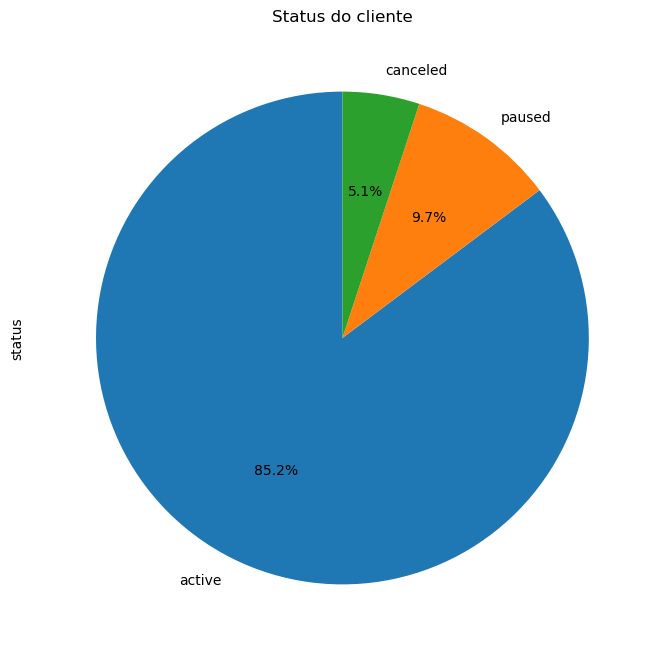

In [75]:
#Análise da feature - Status 

dfChurn.value_counts().plot.pie(figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title("Status do cliente")
plt.show()

No gráfico acima podemos ter uma melhor visualização da quantidade de usuários que mantém a assinatura do serviço ativo (85,2%), pausado (9,7%) e cancelado (5,1%)

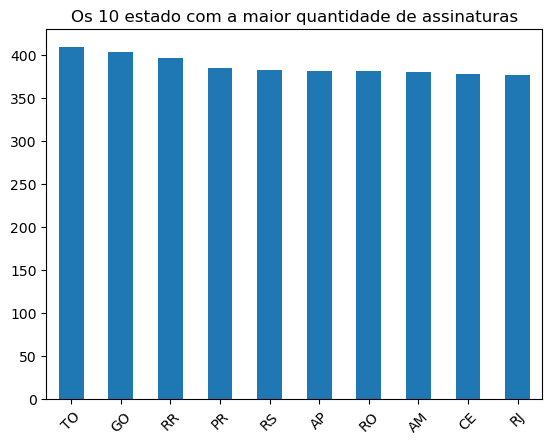

In [81]:
dfState = dfDados['state'].value_counts()[:10]
dfState.plot.bar(title = "Os 10 estado com a maior quantidade de assinaturas", rot=45)
_= plt.show()

No gráfico acima podemos ter uma melhor visualização da quantidade de assinaturas do serviço por estado do Brasil. Chegando a conclusão que o estado que mantém mais usuários ativos é o Tocantins (TO)

<h1> Churn X Canal de conversão <h1> 

Nesta etapa iremos análisar se ocorre diferença no número de cancelamento de assinatura dependendo do canal de conversão (marketing_source)

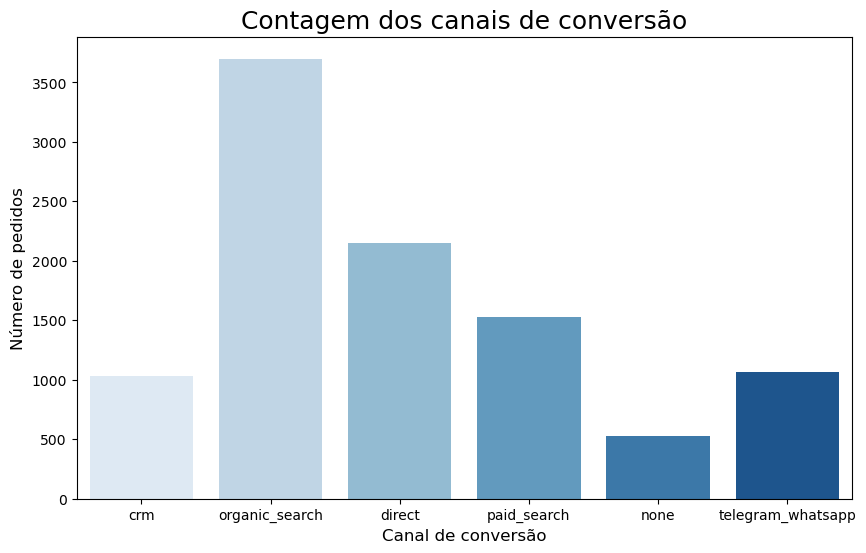

In [156]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=dfDados, x='marketing_source', palette='Blues')
plt.ylabel("Número de pedidos", size=12) 
plt.xlabel("Canal de conversão", size=12) 
plt.title('Contagem dos canais de conversão', size=18) 
plt.show()

In [99]:
#quantidade de cada canal de conversão que ainda está ativo, pausado ou cancelado

GroupCanal= pd.DataFrame(dfDados.groupby(['status', 'marketing_source'])['id'].aggregate('count'))
GroupCanal[:10]

id
status   marketing_source       
active   crm                 874
         direct             1872
         none                439
         organic_search     3118
         paid_search        1307
         telegram_whatsapp   914
canceled crm                  43
         direct               96
         none                 34
         organic_search      196

In [102]:
#dataframe com as informações acima 

dataCanal = {
    'status' : ['ativos', 'cancelaram', 'pausaram', 'total'],
    'CRM' : [874, 43, 112, 1029],
    'telegram' : [914, 66, 88, 1068],
    'pesquisa_paga': [1307, 70, 149, 1526],
    'venda_direta' : [1872, 96, 181, 2149],
    'pesquisa_organica' : [3118, 196, 385,3699],
    
}

dataCanal = pd.DataFrame(dataCanal)
dataCanal

,status,CRM,telegram,pesquisa_paga,venda_direta,pesquisa_organica
0,ativos,874,914,1307,1872,3118
1,cancelaram,43,66,70,96,196
2,pausaram,112,88,149,181,385
3,total,1029,1068,1526,2149,3699


In [105]:
#Calculando o churn de cada canal de conversão 

churn_crm = ((dataCanal.iloc[1,1] + dataCanal.iloc[2,1]) / dataCanal.iloc[3,1])*100
churn_telegram = ((dataCanal.iloc[1,2] + dataCanal.iloc[2,2]) / dataCanal.iloc[3,2])*100
churn_PesquisaPaga = ((dataCanal.iloc[1,3] + dataCanal.iloc[2,3]) / dataCanal.iloc[3,3])*100
churn_VendaDireta = ((dataCanal.iloc[1,4] + dataCanal.iloc[2,4]) / dataCanal.iloc[3,4])*100
churn_PesquisaOrganica = ((dataCanal.iloc[1,5] + dataCanal.iloc[2,5]) / dataCanal.iloc[3,5])*100

In [107]:
#Imprimindo os resultados calculados acima 

print(f"O churn do canal de conversão CRM é {churn_crm:.2f}%")
print(f"O churn do canal de conversão do telegram/whatsapp é {churn_telegram:.2f}% ")
print(f"O churn do canal de conversão Pesuisa Paga é {churn_PesquisaPaga:.2f}%  ")
print(f"O churn do canal de conversão Venda Direta é {churn_VendaDireta:.2f}%  ")
print(f"O churn do canal de conversão Pesquisa Orgânica é {churn_PesquisaOrganica:.2f}%  ")

O churn do canal de conversão CRM é 15.06%
O churn do canal de conversão do telegram/whatsapp é 14.42% 
O churn do canal de conversão Pesuisa Paga é 14.35%  
O churn do canal de conversão Venda Direta é 12.89%  
O churn do canal de conversão Pesquisa Orgânica é 15.71%  


<h1> Churn X Fidelidade <h1>

Nesta seção, irei comparar o churn rate com a quantidade de meses que o contrato do cliente está ativo, que vai ser denominado como "fidelidade". <br><br> 
Será verificado visualmente se é possível observar alguma tendência ou padrão de perda de clientes baseado no tempo de fidelidade.

In [204]:
#conversão tipo object para datetime 

dfDados['created_at'] = pd.to_datetime(dfDados['created_at'])
dfDados['updated_at'] = pd.to_datetime(dfDados['updated_at'])
dfDados['deleted_at'] = pd.to_datetime(dfDados['deleted_at'])
dfDados['birth_date'] = pd.to_datetime(dfDados['birth_date'])

In [205]:
#criação de uma coluna com contendo apenas quem cancelou a assinatura
#sendo false = assinatura ativa/pasauda e true = assinatura cancelada

dfDados['assinatura_cancelada'] = (dfDados['status'] == 'deleted') 

In [206]:
dfDados

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,...,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,assinatura_cancelada
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-10-07,active,2.31.7,...,AM,Aparecida 7Âª SeÃ§Ã£o,01/14/21 11:23 AM,151142941888541,10,906857651331245,6,35,crm,False
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:00,2021-08-01 11:23:00,NaT,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-06-07,paused,3.30.12,...,RR,Santa Isabel,2021-08-01 11:23:00,236991789979188,4,236991789979188,1,41,organic_search,False
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-07-03 23:46:00,2021-07-01 11:23:00,NaT,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,2063-03-18,active,3.28.9,...,RR,Estrela,2021-07-01 11:23:00,211955597446163,13,23315115719078,11,42,organic_search,False
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:00,2021-10-01 11:23:00,NaT,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21,active,3.34.3,...,PE,Confisco,2021-10-01 11:23:00,204113226530216,8,122467935918129,6,39,organic_search,False
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-08-06 12:09:00,2021-01-18 11:23:00,NaT,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07,active,3.19.8,...,RJ,Vila Suzana Segunda SeÃ§Ã£o,01/18/21 11:23 AM,25294099747406,9,202352797979248,8,31,crm,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,90c9fd5f-80d2-4f59-9970-6b3e6dac5f57,2017-12-09 00:35:00,2021-01-31 11:23:00,NaT,eb89d44181a7873ba67f24ff511fc57f,befbd1b02e0a4d52a913adbd093789ab,be93ff9948bf23bd373599f3d5d3798c,1961-12-09,active,4.30.12,...,RN,ConcÃ³rdia,01/31/21 11:23 AM,215079785397669,5,107539892698835,5,18,paid_search,False
9996,0edb7aec-8816-4904-bcd7-cbe141391441,2018-04-20 07:43:00,2021-01-18 11:23:00,NaT,8d5dc7dd1225fa9746f4509c8cadeedb,d1beba53e18c097d0bb2a4a91de9ad09,1aafbc7d76201a320a5f97dafd891e95,2069-09-15,active,4.28.13,...,AL,SÃ£o Francisco,01/18/21 11:23 AM,254525825985783,10,229073243387205,9,31,organic_search,False
9997,30130652-d616-4b40-adbb-189e3351016c,2017-08-14 00:28:00,2021-03-01 11:23:00,NaT,9517c44d34d9965d25e77487a510b696,baffbfb45790c0bca921d418b2ccc987,0cad001abedb688cc64a819d04a3bc71,2060-01-14,active,3.18.11,...,SC,Frei Leopoldo,2021-03-01 11:23:00,208741901833659,8,125245141100196,6,46,paid_search,False
9998,37b52952-afdd-425a-9149-4012ea48ac87,2017-01-19 19:19:00,2021-09-01 11:23:00,NaT,c800df6e2b9449cb5d6a812563566887,0373a1cdff0fca0b4c4111401051548c,ffd915817fc2bd67575436b7f8e57bde,1957-06-08,active,5.51.6,...,PA,Cdi Jatoba,2021-09-01 11:23:00,211174796477636,9,0,0,40,direct,False


In [207]:
#criação colunas com os meses que cada cliente assinou a assinatura do serviço

dfDados['meses_de_contrato'] = (dfDados['deleted_at'] - dfDados['created_at']).dt.days / 30 

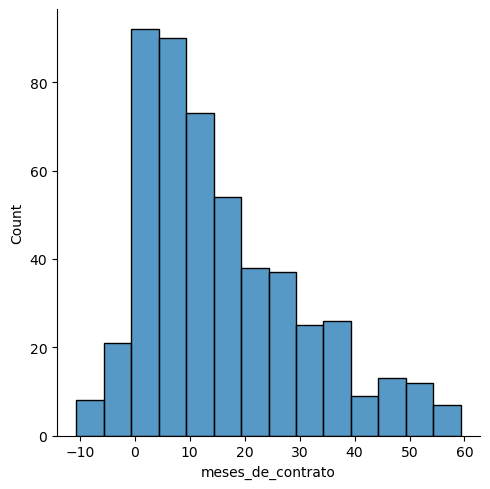

In [208]:
#quantidade de meses que a pessoa assinou a assinatura do serviço 

sns.displot(data=dfDados, x='meses_de_contrato', binwidth=5)

Neste primeiro gráfico, de histograma da quantidade de clientes por meses de contrato, já é possível observar dois fatos interessantes:

1.Existe uma quantidade muito grande de clientes novos (0-5 meses);<br><br>
2.Existe uma pequena quantidade de clientes antigos (acima de 40 meses de contrato), o que pode indicar um baixo interesse do cliente em manter a assinatura por um longo prazo

In [51]:
# verificando a quantidade de clientes mais novos e mais antigos
total_customers = len(dfDados)
total_customers_15_months = len(dfDados[dfDados['meses_de_contrato'] <= 15])
total_customers_40_months= len(dfDados[dfDados['meses_de_contrato'] > 40])

# calculando a proporção de clientes
perc_customers_15_months = round(total_customers_15_months/total_customers*100, 2)
perc_customers_40_months = round(total_customers_40_months/total_customers*100, 2)

print(f'Total de clientes: {total_customers}')
print(f'Total de clientes novos (até 15 meses): {total_customers_15_months}, {perc_customers_15_months}%')
print(f'Total de clientes fiéis (acima de 40 meses): {total_customers_40_months}, {perc_customers_40_months}%')


Total de clientes: 10000
Total de clientes novos (até 15 meses): 295, 2.95%
Total de clientes fiéis (acima de 40 meses): 37, 0.37%


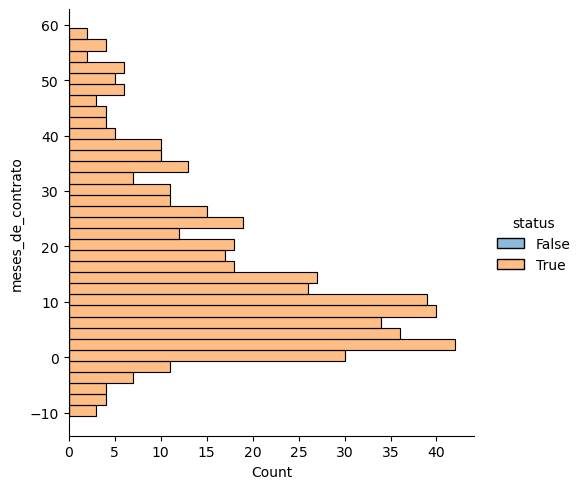

In [52]:
sns.displot(data=dfDados, binwidth=2, y='meses_de_contrato', hue=dfDados['status'] == 'canceled')

Com esse gráfico e com os insights mostrados é possível visualizar que mais da metade das pessoas que possuem até 10 meses de contrato cancelaram o plano.

<h3> Conclusão <h3> 

Graficamente, é possível observar que a maior parte dos cancelamentos se concentra em clientes novos, com até 15 meses de contrato, e que muitos deles estão cancelando o plano logo após o primeiro e segundo mês de contrato.

<h1> Churn X Anos <h1> 

Para fazer essa análise primeiro precisamos passar as datas de created_at, updated_at e last_date_purchase para anos

In [190]:
#Conversão das colunas para o objeto datetime 

dfAnos['created_at'] = pd.to_datetime(dfAnos['created_at'], errors='coerce', format='%Y-%m-%d')
dfAnos['updated_at'] = pd.to_datetime(dfAnos['updated_at'], errors='coerce', format='%Y-%m-%d')
dfAnos['deleted_at'] = pd.to_datetime(dfAnos['deleted_at'], errors='coerce', format='%Y-%m-%d')
dfAnos['last_date_purchase'] = pd.to_datetime(dfAnos['last_date_purchase'], errors='coerce', format='%Y-%m-%d')

In [192]:
dfAnos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   created_at          3904 non-null   datetime64[ns]
 2   updated_at          3701 non-null   datetime64[ns]
 3   deleted_at          192 non-null    datetime64[ns]
 4   name_hash           10000 non-null  object        
 5   email_hash          10000 non-null  object        
 6   address_hash        10000 non-null  object        
 7   birth_date          10000 non-null  object        
 8   status              10000 non-null  object        
 9   version             10000 non-null  object        
 10  city                10000 non-null  object        
 11  state               10000 non-null  object        
 12  neighborhood        10000 non-null  object        
 13  last_date_purchase  3710 non-null   datetime64[

In [193]:
dfAnos.head(5)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,NaT,NaT,NaT,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-10-07 00:00:00,active,2.31.7,Peixoto da Praia,AM,Aparecida 7Âª SeÃ§Ã£o,NaT,151142941888541,10,906857651331245,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,NaT,2021-08-01 11:23:00,NaT,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-06-07 00:00:00,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-08-01 11:23:00,236991789979188,4,236991789979188,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-07-03 23:46:00,2021-07-01 11:23:00,NaT,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,2021-07-01 11:23:00,211955597446163,13,23315115719078,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,NaT,2021-10-01 11:23:00,NaT,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,2021-10-01 11:23:00,204113226530216,8,122467935918129,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-08-06 12:09:00,NaT,NaT,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07 00:00:00,active,3.19.8,das Neves,RJ,Vila Suzana Segunda SeÃ§Ã£o,NaT,25294099747406,9,202352797979248,8,31,crm


In [194]:
dfAnos['created_at'] = dfAnos.created_at.dt.year
dfAnos['updated_at'] = dfAnos.updated_at.dt.year
dfAnos['last_date_purchase'] = dfAnos.last_date_purchase.dt.year

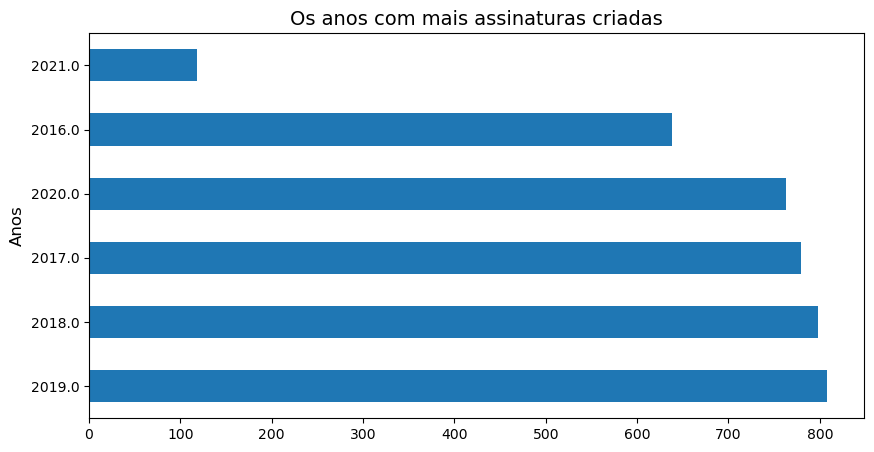

In [195]:
#Análise dos anos com mais assinaturas criadas

plt.figure(figsize=(10,5))
dfAnos['created_at'].value_counts().plot(kind='barh')
plt.ylabel("Anos", size=12) 
plt.title("Os anos com mais assinaturas criadas", size=14) 
plt.show()

Como podemos observar no gráfico acima o ano com maior quantidade de assinaturas criadas foi 2019 e o com a menor quantidade foi 2021.

In [198]:
dfAnos['deleted_at'] = dfAnos.deleted_at.dt.year

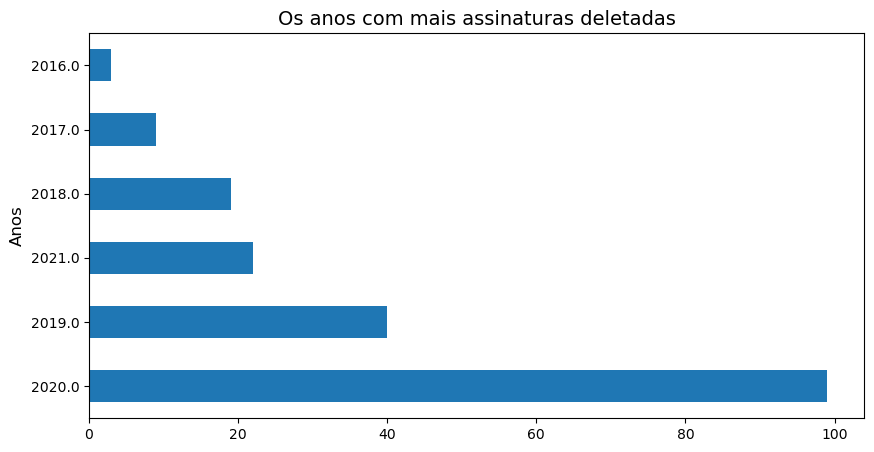

In [199]:
#Análise dos anos com mais assinaturas deletadas

plt.figure(figsize=(10,5))
dfAnos['deleted_at'].value_counts().plot(kind='barh')
plt.ylabel("Anos", size=12) 
plt.title("Os anos com mais assinaturas deletadas", size=14) 
plt.show()

No gráfico acima podemos observar que o ano com a maior quantidade de cancelamento de assinaturas foi 2020 e o menor indice foi em 2016.

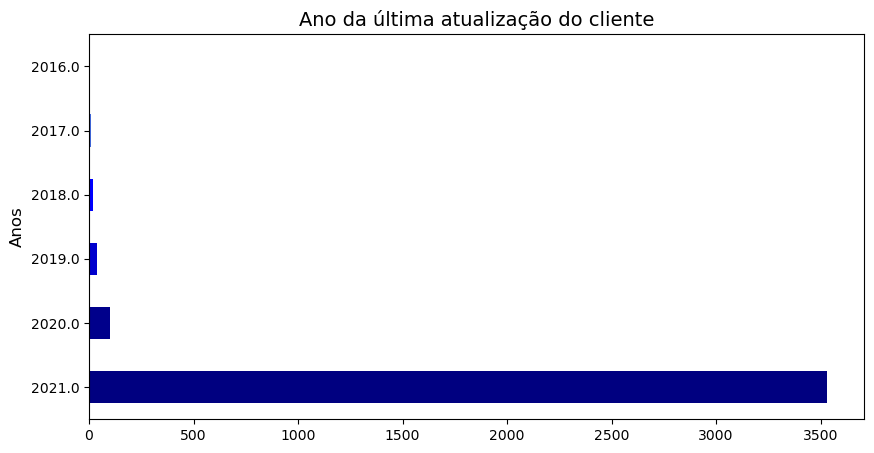

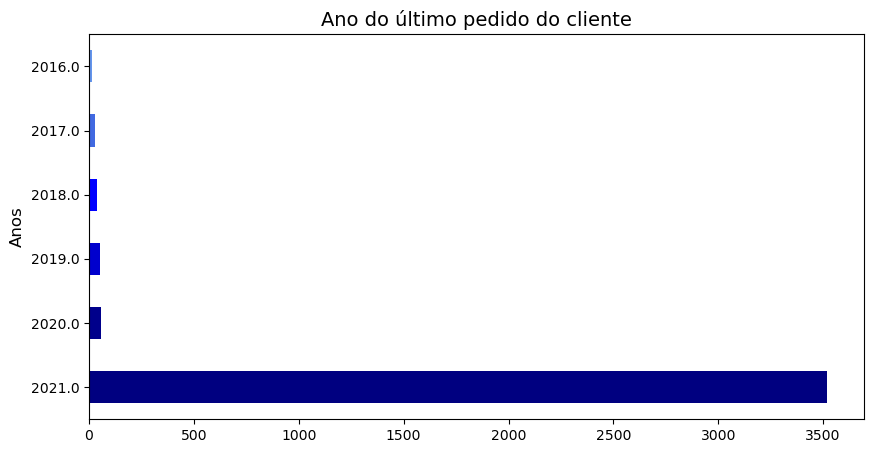

In [209]:
#Análise dos anos da última atualização na plataforma
colors = ['navy', 'darkblue', 'mediumblue', 'blue', 'royalblue', 'cornflowerblue']

plt.figure(figsize=(10,5))
dfAnos['updated_at'].value_counts().plot(kind='barh', color = colors)
plt.ylabel("Anos", size=12) 
plt.title("Ano da última atualização do cliente", size=14) 
plt.show()

#Último pedido feito na plataforma
plt.figure(figsize=(10,5))
dfAnos['last_date_purchase'].value_counts().plot(kind='barh', color = colors)
plt.ylabel("Anos", size=12) 
plt.title("Ano do último pedido do cliente", size=14) 
plt.show()

<h1> Churn X Gastos 

Irei utilizar a biblioteca Seaborn para criar um gráfico de dispersão (scatterplot) categórico, comparando os gastos totais de cada cliente, divididos entre os que cancelaram o plano, mantém ativo ou pausado. Minha intenção é observar se há uma concentração de clientes que cancelaram o plano dentro de algum intervalo de gastos.


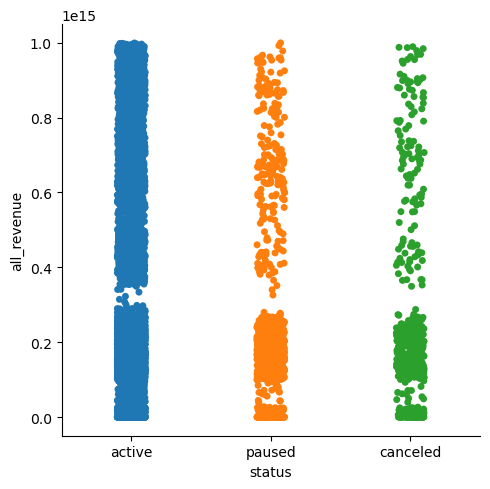

In [62]:
#gráfico status X total de receita realizada pelo cliente

sns.catplot(x='status', y='all_revenue', data=dfDados)

No gráfico acima podemos observar que os usuários mais ativos tendem a ter uma maior receita quando comparado com os usuários que cancelam e pausam a assinatura do serviço. Logo a maior fonte de renda para a Petlove vem dos usuários ativos. <br><br> 

Agora irei fazer a comparação com os gastos medio de cada cliente:

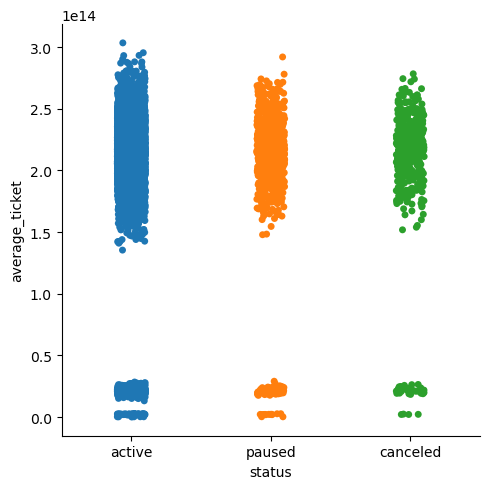

In [67]:
#gráfico status X média de gasto por pedido de cada cliente 

sns.catplot(x='status', y='average_ticket', data=dfDados)

É possível observar que, dentre os clientes que cancelaram o plano, há uma concentração na faixa dos que pagam entre 2x10^14 e 2.5x10^14 dólares (ou reais? Não sei) de gasto por media dos pedidos. <br><br>

Podemos alterar o tipo de representação gráfica para violin, que auxilia a visualizar melhor onde os dados estão mais concentrados.

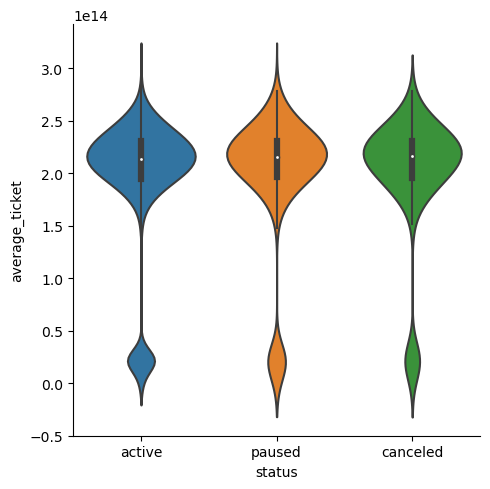

In [68]:
#gráfico status X média de gastos por pedido de cada cliente 

sns.catplot(x='status', y='average_ticket', kind='violin', data=dfBaseDados)
     

<h1> Churn X Outras variáveis <h1>

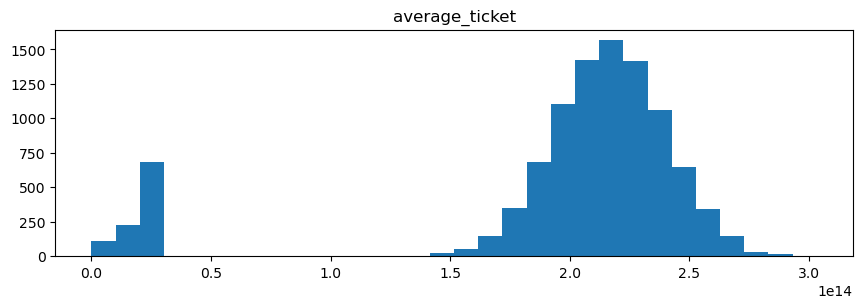

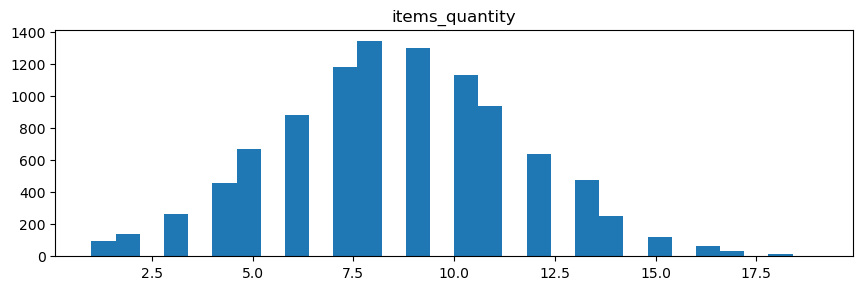

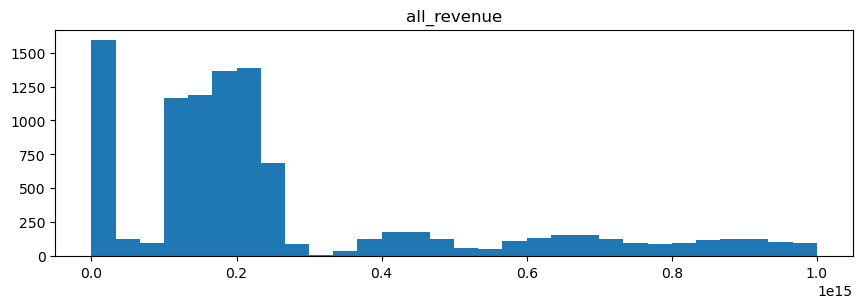

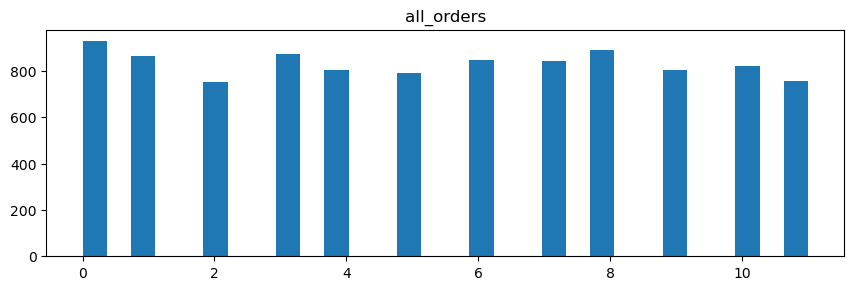

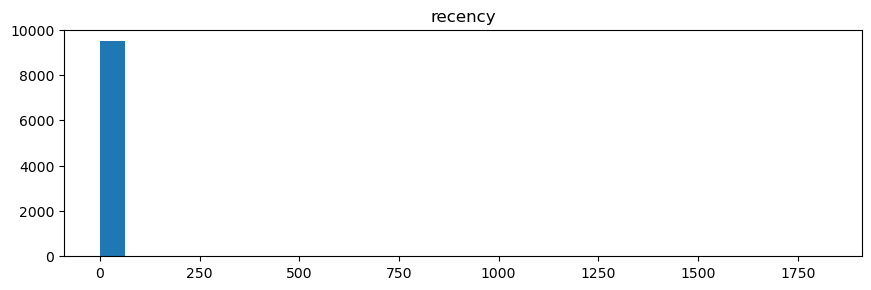

In [163]:
colunas = 'average_ticket', 'items_quantity', 'all_revenue', 'all_orders', 'recency'

def dist(dfDados, colunas):
    
    for i in colunas:
        plt.figure(figsize=(35, 10))
        plt.subplot(3, 3, 1)
        plt.hist(data=dfDados, x=i, bins=30)
        plt.title(i)
        plt.show()
        plt.plot   
        
dist(dfDados, colunas)

<h1> Correlação das variáveis <h1>

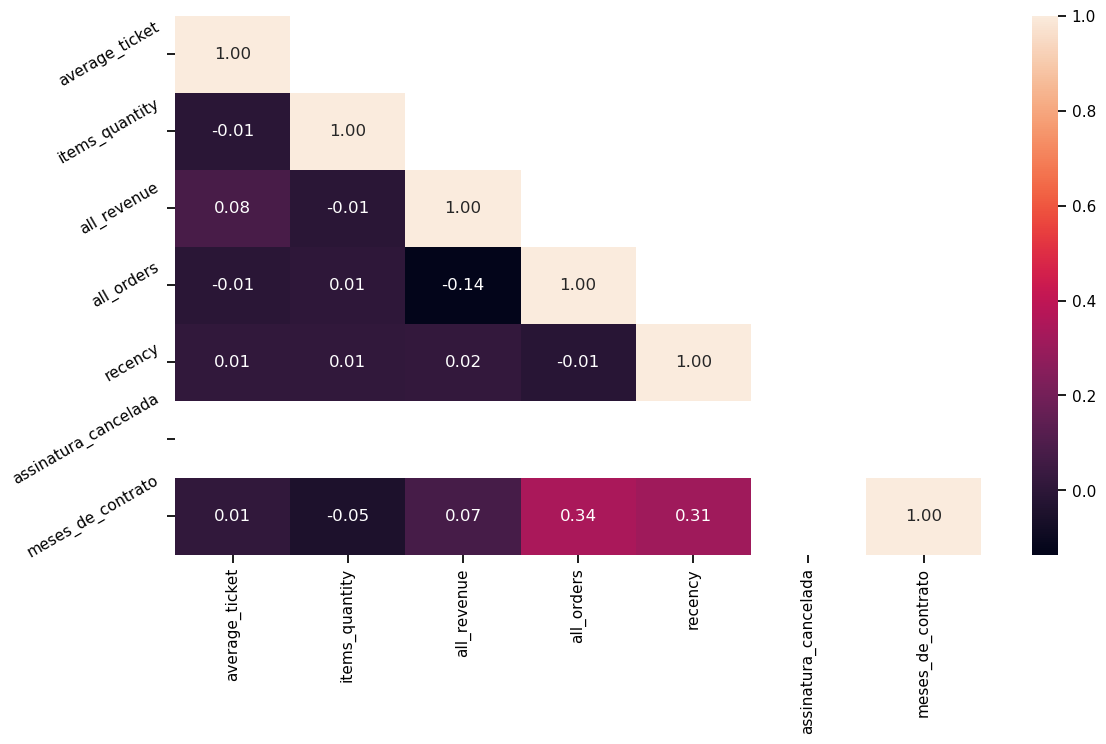

In [212]:
#verificando a correlação das variáveis

corr = dfDados.corr() 
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f') 
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

<h1> Tratamento de dados <h1> 

<AxesSubplot:>

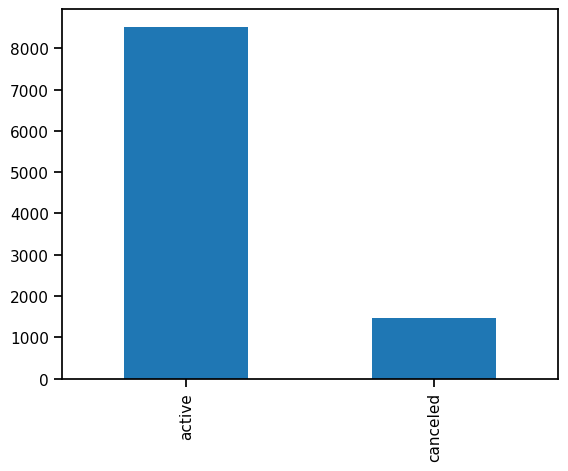

In [213]:
# Balancemento da coluna status

dfDados['status'] = dfDados['status'].replace('paused', 'canceled')
dfDados.status.value_counts().plot(kind='bar')